<a href="https://colab.research.google.com/github/vovizzz/ml/blob/main/Nykyforov_26_5_1_FIT_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перші 5 рядків датасету Ірис:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


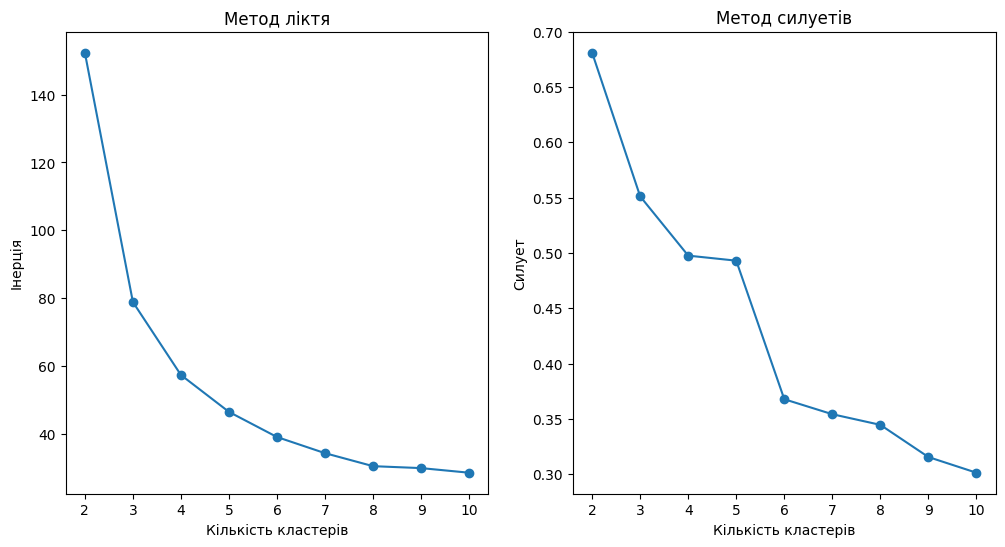

Оптимальна кількість кластерів (метод силуетів): 2


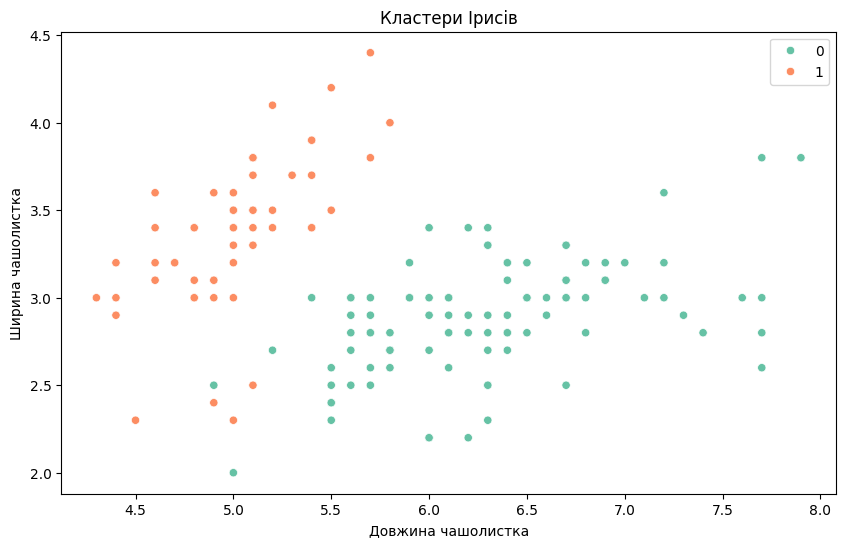

Висновки:
Оптимальна кількість кластерів визначена методом силуетів. Візуалізація показує, що дані кластеризуються, причому кожен кластер представлений різними кольорами.


In [9]:

# Імпорт необхідних бібліотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Завантаження датасету Ірис
iris = sns.load_dataset('iris')

# 1. Вивести перших 5 рядків
print("Перші 5 рядків датасету Ірис:")
print(iris.head())

# 2. Метод ліктя для визначення оптимальної кількості кластерів
inertia = []
silhouette_scores = []

# Перебір кількості кластерів від 2 до 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris.iloc[:, :-1])  # Використовуємо всі ознаки, крім цільової
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(iris.iloc[:, :-1], kmeans.labels_))

# Візуалізація методу ліктя
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

# Візуалізація методу силуетів
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')

plt.show()

# Визначення оптимальної кількості кластерів (на основі графіків)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальна кількість кластерів (метод силуетів): {optimal_k}")

# 3. Візуалізація кластерів з оптимальною кількістю кластерів
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
iris['Cluster'] = kmeans_optimal.fit_predict(iris.iloc[:, :-1])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='Cluster', palette='Set2')
plt.title('Кластери Ірисів')
plt.xlabel('Довжина чашолистка')
plt.ylabel('Ширина чашолистка')
plt.legend()
plt.show()

# Висновки
print("Висновки:")
print("Оптимальна кількість кластерів визначена методом силуетів. Візуалізація показує, що дані кластеризуються, причому кожен кластер представлений різними кольорами.")
